# Acquiring Data from open repositories

A crucial step in the work of a computational biologist is not only to analyse data, but acquiring datasets to analyse as well as toy datasets to test out computational methods and algorithms. The internet is full of such open datasets. Sometimes you have to sign up and make a user to get authentication, especially for medical data. This can sometimes be time consuming, so here we will deal with easy access resources, mostly of modest size. Multiple python libraries provide a `dataset` module which makes the effort to fetch online data extremely seamless, with little requirement for preprocessing. 

#### Goal of the notebook
Here you will get familiar with some ways to fetch datasets from online. We do some data exploration on the data just for illustration, but the methods will be covered later. 

In [1]:
# import basic libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

We start with scikit-learn's datasets for testing out ML algorithms. Visit [here](https://scikit-learn.org/stable/modules/classes.html?highlight=datasets#module-sklearn.datasets) for an overview of the datasets.

In [3]:
from sklearn.datasets import fetch_olivetti_faces, fetch_20newsgroups, load_breast_cancer, load_diabetes, load_digits, load_iris

C:\Users\Peder\Anaconda3\envs\cbm101\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Load the MNIST dataset (images of hand written digits)

In [4]:
X,y = load_digits(return_X_y=True)

In [5]:
y.shape

(1797,)

In [6]:
X.shape #1797 images, 64 pixels per image

(1797, 64)

#### exercise 1.  Make a function `plot` taking an argument (k) to visualize the k'th sample. 
It is currently flattened, you will need to reshape it. Use `plt.imshow` for plotting. 

In [7]:
# %load solutions/ex2_1.py
def plot(k):
    plt.imshow(X[k].reshape(8,8), cmap='gray')
    plt.title(f"Number = {y[k]}")
    plt.show()

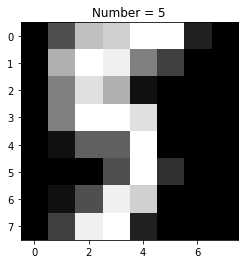

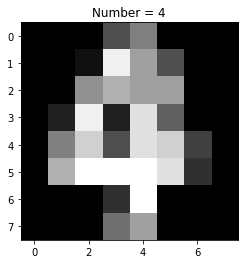

In [8]:
plot(15); plot(450)

In [9]:
faces = fetch_olivetti_faces()

#### Exercise 2. Inspect the dataset. How many classes are there? How many samples per class? Also, plot some examples. What do the classes represent? 

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

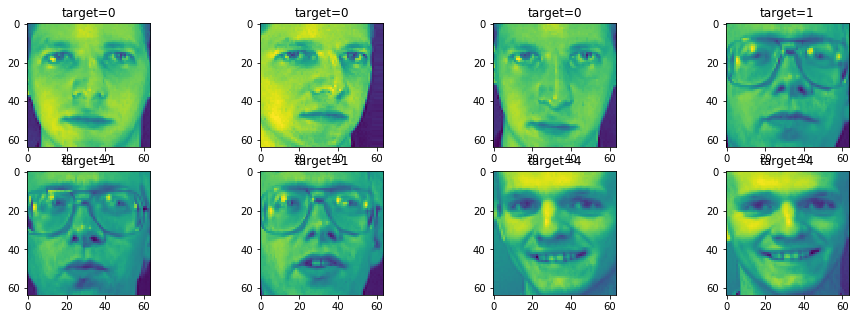

In [10]:
# %load solutions/ex2_2.py

# example solution. 
# You are not expected to make a nice plotting function,
# you can simply call plt.imshow a number of times and observe

print(faces.DESCR) # this shows there are 40 classes, 10 samples per class
print(faces.target) #the targets i.e. classes
print(np.unique(faces.target).shape) # another way to see n_classes

X = faces.images
y = faces.target

fig = plt.figure(figsize=(16,5))
idxs = [0,1,2, 11,12,13, 40,41]
for i,k in enumerate(idxs):
    ax=fig.add_subplot(2,4,i+1)
    ax.imshow(X[k])
    ax.set_title(f"target={y[k]}")
    
# looking at a few plots shows that each target is a single person.

Once you have made yourself familiar with the dataset you can do some data exploration with unsupervised methods, like below. The next few lines of code are simply for illustration, don't worry about the code (we will cover unsupervised methods in submodule F).

In [11]:
from sklearn.decomposition import randomized_svd

In [12]:
X = faces.data

In [102]:
n_dim = 3
u, s, v = randomized_svd(X, n_dim)

Now we have factorized the images into their constituent parts. The code below displays the various components isolated one by one.

In [103]:
def show_ims(ims):
    fig = plt.figure(figsize=(16,10))
    idxs = [0,1,2, 11,12,13, 40,41,42, 101,101,103]
    for i,k in enumerate(idxs):
        ax=fig.add_subplot(3,4,i+1)
        ax.imshow(ims[k])
        ax.set_title(f"target={y[k]}")

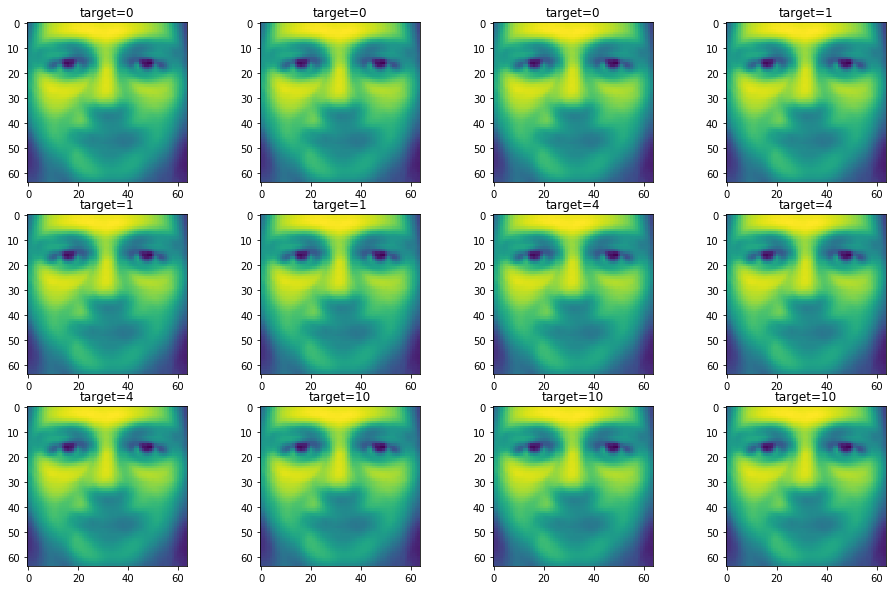

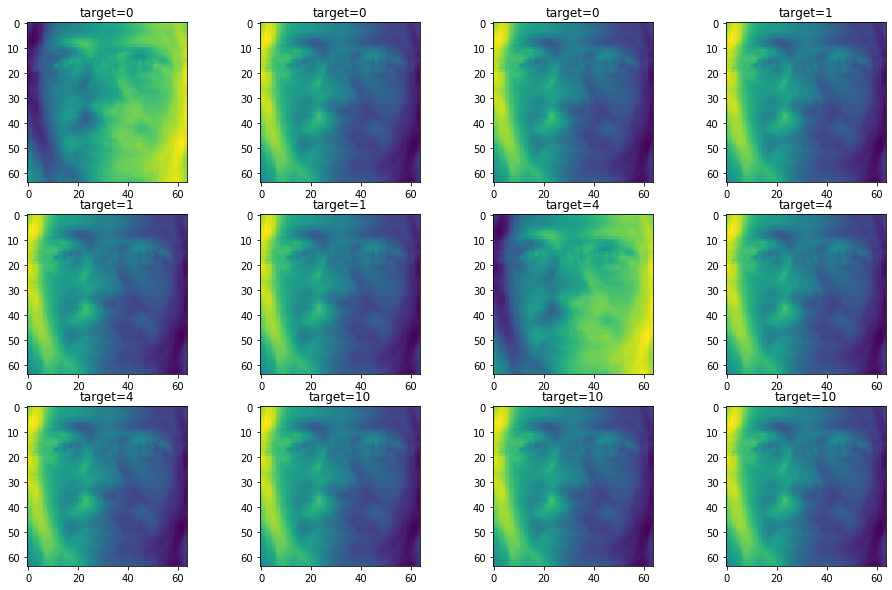

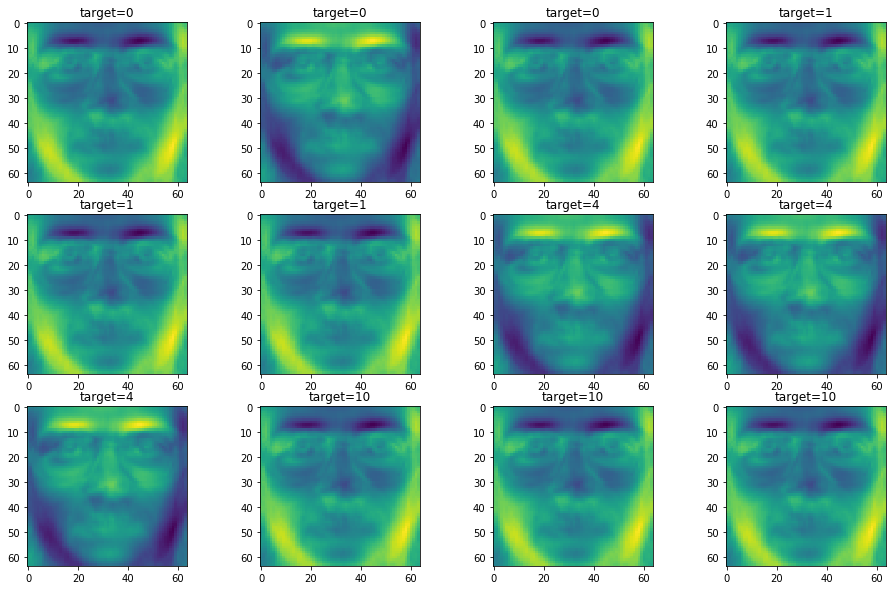

In [104]:
for i in range(n_dim):
    my_s = np.zeros(s.shape[0])
    my_s[i] = s[i]
    recon = u@np.diag(my_s)@v
    recon = recon.reshape(400,64,64)
    show_ims(recon)

Are you able to see what the components represent? It at least looks like the second component signifies the lightning  (the light direction), the third highlights eyebrows and facial chin shape.

In [147]:
from sklearn.manifold import TSNE

In [148]:
tsne = TSNE(init='pca', random_state=0)
trans = tsne.fit_transform(X)

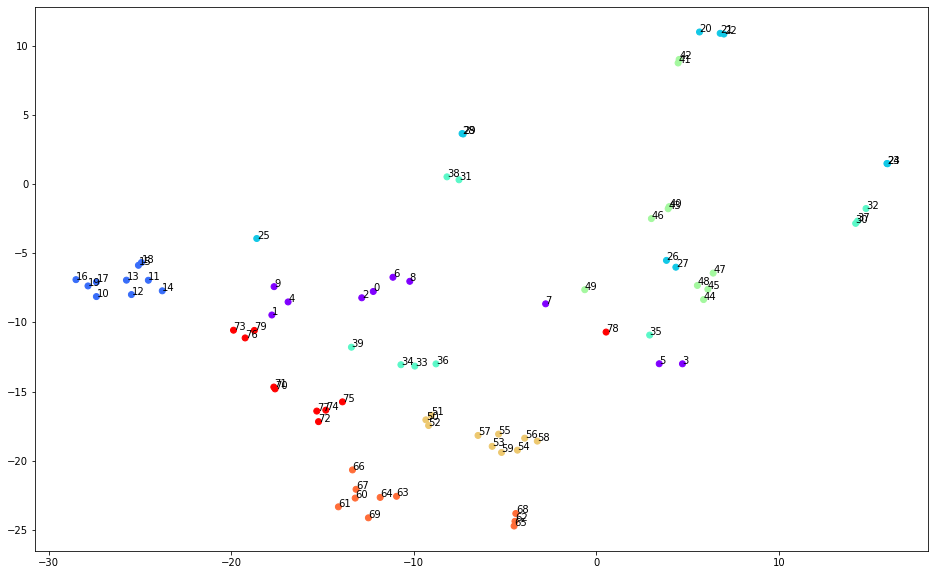

In [149]:
m = 8*10 # choose 4 people

plt.figure(figsize=(16,10))
xs, ys = trans[:m,0], trans[:m,1]
plt.scatter(xs, ys, c=y[:m], cmap='rainbow')

for i,v in enumerate(zip(xs,ys, y[:m])):
    xx,yy,s = v 
    #plt.text(xx,yy,s) #class
    plt.text(xx,yy,i) #index

Many people seem to have multiple subclusters. What is the difference between those clusters? (e.g. 68,62,65 versus the other 60's)

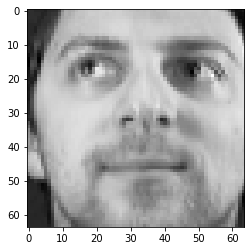

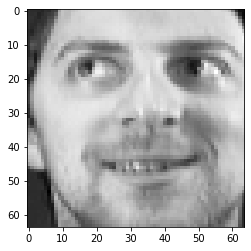

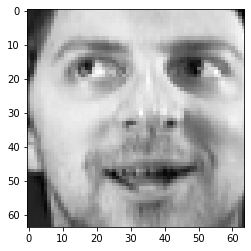

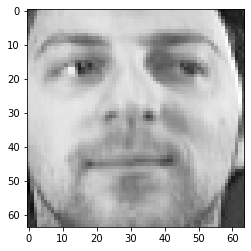

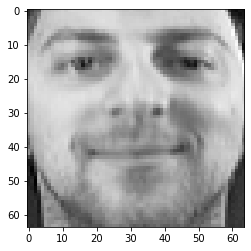

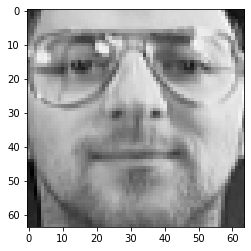

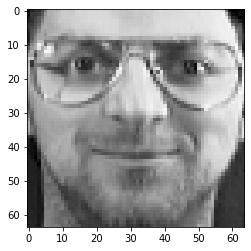

In [153]:
ims = faces.images

idxs = [68,62,65,66,60,64,63]
#idxs = [9,4,1, 5,3]
for k in idxs:
    plt.imshow(ims[k], cmap='gray')
    plt.show()

In [32]:
def show(im):
    return plt.imshow(im, cmap='gray')

In [3]:
import pandas as pd
df= pd.read_csv('data/archive/covid_impact_on_airport_traffic.csv')

In [5]:
df.shape

(5936, 11)

In [7]:
df.describe()

,Version,PercentOfBaseline
count,5936.0,5936.000000
mean,1.0,65.581705
std,0.0,21.985070
min,1.0,0.000000
25%,1.0,52.000000
50%,1.0,66.000000
75%,1.0,82.000000
max,1.0,100.000000


In [8]:
df.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-07-05,1.0,Kingsford Smith,52,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-05-28,1.0,Kingsford Smith,61,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-05-07,1.0,Kingsford Smith,62,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-06-24,1.0,Kingsford Smith,58,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-08-05,1.0,Kingsford Smith,20,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [9]:
df.Country.unique()

array(['Australia', 'Chile', 'Canada', 'United States of America (the)'],
      dtype=object)

In [11]:
df.ISO_3166_2.unique()

array(['AU', 'CL', 'CA-AB', 'CA-BC', 'CA-MB', 'CA-NS', 'CA-ON', 'CA-QC',
       'US-CA', 'US-CO', 'US-FL', 'US-GA', 'US-HI', 'US-IL', 'US-MA',
       'US-MI', 'US-NC', 'US-NJ', 'US-NV', 'US-NY', 'US-TX', 'US-VA',
       'US-WA'], dtype=object)

In [10]:
df.AggregationMethod.unique()

array(['Daily'], dtype=object)

Here we will look at [OpenML](https://www.openml.org/) - a repository of open datasets free to explore data and test methods.

### Fetching an OpenML dataset

We need to pass in an ID to access, as follows:

In [2]:
from sklearn.datasets import fetch_openml

OpenML contains all sorts of datatypes. By browsing the website we found a electroencephalography (EEG) dataset to explore: 

In [3]:
data_id = 1471 #this was found by browsing OpenML
dataset = fetch_openml(data_id=data_id, as_frame=True)

In [4]:
dir(dataset)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [5]:
dataset.url

'https://www.openml.org/d/1471'

In [6]:
type(dataset)

sklearn.utils.Bunch

In [7]:
print(dataset.DESCR)

**Author**: Oliver Roesler  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State), Baden-Wuerttemberg, Cooperative State University (DHBW), Stuttgart, Germany  
**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)  

All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. The duration of the measurement was 117 seconds. The eye state was detected via a camera during the EEG measurement and added later manually to the file after analyzing the video frames. '1' indicates the eye-closed and '0' the eye-open state. All values are in chronological order with the first measured value at the top of the data.

The features correspond to 14 EEG measurements from the headset, originally labeled AF3, F7, F3, FC5, T7, P, O1, O2, P8, T8, FC6, F4, F8, AF4, in that order.

Downloaded from openml.org.


In [8]:
original_names = ['AF3',
 'F7',
 'F3',
 'FC5',
 'T7',
 'P',
 'O1',
 'O2',
 'P8',
 'T8',
 'FC6',
 'F4',
 'F8',
 'AF4']

In [9]:
dataset.feature_names

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14']

In [10]:
df = dataset.frame

In [11]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Class
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,1
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,1
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,1
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,1
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,1


In [12]:
df.shape[0] / 117
# 128 frames per second

128.03418803418805

In [13]:
df = dataset.frame
y = df.Class
#df.drop(columns='Class', inplace=True)

In [14]:
df.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
Class    category
dtype: object

In [15]:
#def summary(s):
#    print(s.max(), s.min(), s.mean(), s.std())
#    print()
#    
#for col in df.columns[:-1]:
#    column = df.loc[:,col]
#    summary(column)

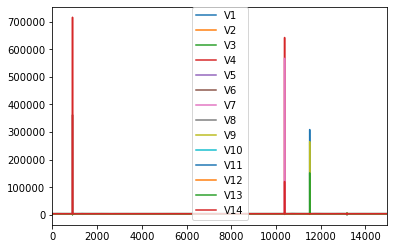

In [16]:
df.plot()

From the plot we can quickly identify a bunch of huge outliers, making the plot look completely uselss. We assume these are artifacts, and remove them.

C:\Users\Peder\Anaconda3\envs\cbm101\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  """Entry point for launching an IPython kernel.


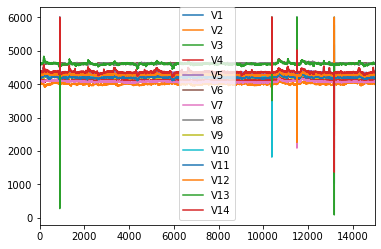

In [19]:
df2 = df.iloc[:,:-1].clip_upper(6000)
df2.plot()

Now we see better what is going on. Lets just remove the frames corresponding to those outliers

In [20]:
frames = np.nonzero(np.any(df.iloc[:,:-1].values>5000, axis=1))[0]
frames

array([  898, 10386, 11509, 13179], dtype=int64)

In [21]:
df.drop(index=frames, inplace=True)

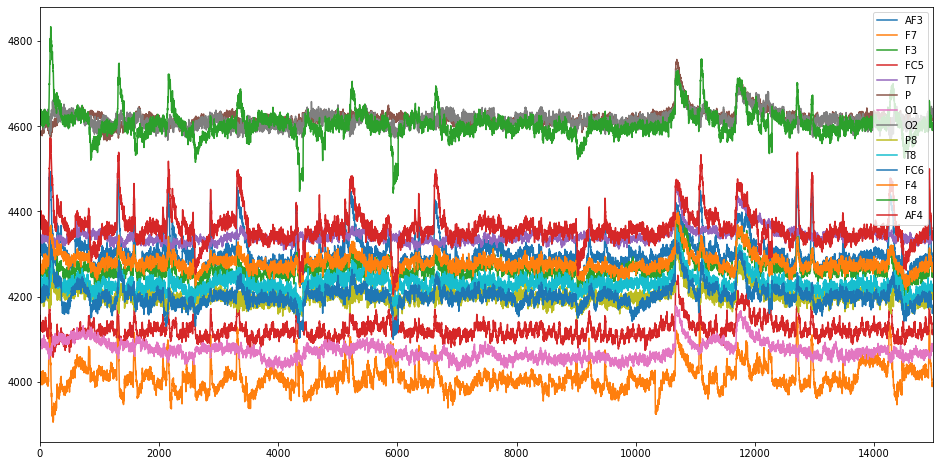

In [45]:
df.plot(figsize=(16,8))
plt.legend(labels=original_names)

In [46]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'Class'],
      dtype='object')

### Do some modelling of the data

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lasso = LogisticRegression(penalty='l2')

In [26]:
X = df.values[:,:-1]
y = df.Class
y = y.astype(np.int) - 1 # map to 0,1

In [27]:
print(X.shape)
print(y.shape)

(14976, 14)
(14976,)


In [28]:
lasso.fit(X,y)

C:\Users\Peder\Anaconda3\envs\cbm101\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
comp = (lasso.predict(X) == y).values

In [30]:
np.sum(comp.astype(np.int))/y.shape[0] # shitty accuracy

0.6442975427350427

In [35]:
lasso.coef_[0].shape

(14,)

In [36]:
names = dataset.feature_names

In [37]:
original_names

['AF3',
 'F7',
 'F3',
 'FC5',
 'T7',
 'P',
 'O1',
 'O2',
 'P8',
 'T8',
 'FC6',
 'F4',
 'F8',
 'AF4']

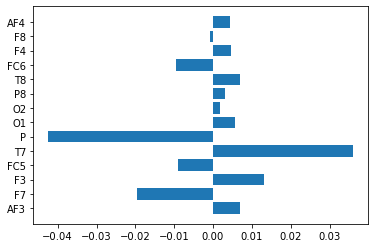

In [38]:
coef = lasso.coef_[0]
plt.barh(range(coef.shape[0]), coef)
plt.yticks(ticks=range(14),labels=original_names)

plt.show()

Interpreting the coeficients: we naturally tend to read the magnitude of the coefficients as feature importance. That is a fair interpretation, but currently we did not scale our features to a comparable range prior to fittting the model, so we cannot draw that conclusion.

### Extra exercise. Go to [OpenML](https://openml.org) and use the search function (or just look around) to find any dataset that interest you. Load it using the above methodology, and try to do anything you can to understand the datatype, visualize it etc.

In [ ]:
### YOUR CODE HERE

### Other open datasets

When toying around with algorithms, it can be practical to use relatively small datasets. A good example is that of `scikit-learn`. `Nilearn` (library for neuroimaging) also provides a collection of neuroimaging datasets.
Many datasets can also be acquired through the competition website [Kaggle](https://www.kaggle.com), in which they describe how to access the data.


- https://nilearn.github.io/modules/reference.html#module-nilearn.datasets
- https://scikit-learn.org/stable/modules/classes.html?highlight=datasets#module-sklearn.datasets
- [Kaggle](https://www.kaggle.com/datasets)